In [1]:
"""Author: Sameer Kesava

Linear Regression of Automobile Data 

Scaling the data and employing k-Fold Cross Validation (k = 10).

Plotting the test and fit data after Regression

Problem statement from Chapter 5
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn and matplotlib"""

'Author: Sameer Kesava\n\nLinear Regression of Automobile Data \n\nScaling the data and employing k-Fold Cross Validation.\n\nPlotting the test and fit data after Regression\n\nProblem statement from Chapter 5\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\n\nDataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\n\nPackages used: numpy, pandas, sklearn and matplotlib'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_df = pd.read_csv("Auto")
data_df.head(10)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,10,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [5]:
data_df.drop(columns = 'Unnamed: 0', inplace=True)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [7]:
len(data_df)

392

In [8]:
#Checking Correlation
data_df.corr(method = 'pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [9]:
k_no = 10
kf = KFold(n_splits=k_no, shuffle = False, random_state=17)

#### Polynomial Fits of Order 1 to 10

In [10]:
X =  data_df[['horsepower']]
X.head()

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [11]:
Y =  data_df['mpg'].values
Y[:5]

array([18., 15., 18., 16., 17.])

In [12]:
lr = LinearRegression()

In [13]:
from sklearn.preprocessing import MaxAbsScaler

In [14]:
# Normalizing the data using MaxAbsScaler
X_transformed = MaxAbsScaler().fit_transform(X)

In [15]:
np.max(X_transformed)

1.0

In [16]:
#Converting to Dataframe
X_transformed_df = pd.DataFrame(X_transformed, columns=['hp'])
X_transformed_df.head()

,hp
0,0.565217
1,0.717391
2,0.652174
3,0.652174
4,0.608696


In [17]:
#Adding higher order values of the feature 'horsepower' as columns
col_name = X_transformed_df.columns[0]
for i in range(2,11):
    X_transformed_df[col_name +'^'+str(i)] = X_transformed**i

In [18]:
X_transformed_df.head()

,hp,hp^2,hp^3,hp^4,hp^5,hp^6,hp^7,hp^8,hp^9,hp^10
0,0.565217,0.319471,0.180570,0.102062,0.057687,0.032606,0.018429,0.010417,0.005888,0.003328
1,0.717391,0.514650,0.369206,0.264865,0.190012,0.136313,0.097790,0.070153,0.050327,0.036104
2,0.652174,0.425331,0.277390,0.180906,0.117982,0.076945,0.050182,0.032727,0.021344,0.013920
3,0.652174,0.425331,0.277390,0.180906,0.117982,0.076945,0.050182,0.032727,0.021344,0.013920
4,0.608696,0.370510,0.225528,0.137278,0.083560,0.050863,0.030960,0.018845,0.011471,0.006982


In [19]:
#Test code
for i in range(1,len(X_transformed_df.columns)+1):
    print(list(range(i)))
    #iterating to yield features in increasing order

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [20]:
#Test code
x = np.arange(0,10,1)
kf_test = KFold(5, random_state=1)
for train, test in kf_test.split(x):
    print(x[train], x[test])

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [21]:
MSE = np.zeros(len(X_transformed_df.columns))
#Creating a zero MSE array of length of the highest order polynomial required

for i in range(1,len(X_transformed_df.columns)+1):
    #iterating to yield features in increasing order
    
    for train, test in kf.split(X_transformed_df.iloc[:, 0:i]):
        #using k-fold split for each set of features generated from the above iterator
        #the split method gives out train and test set indices
        
        fit_kf = lr.fit(X_transformed_df.iloc[train, 0:i],Y[train])
        #linear regression on the training data
        
        test_fit_kf = fit_kf.predict(X_transformed_df.iloc[test, 0:i])
        #predicting the test label using the test data
        
        MSE[i-1] = MSE[i-1] + np.sum((Y[test] - test_fit_kf)**2)/len(Y[test])
        #Calculating MSE for each test set
    
    MSE[i-1] = MSE[i-1]/k_no
    #Final MSE
MSE

array([27.43993365, 21.23584006, 21.33660618, 21.35388698, 20.90564093,
       20.78051635, 20.64138639, 20.93779869, 20.81505998, 21.0080812 ])

""" Sharp decrease from Linear to Binomial but going to higher order, not much different from Binomial. Hence Binomial model appears to be the best fit """

### Plotting

In [22]:
binomial_fit = lr.fit(X_transformed_df.iloc[:,0:2], Y)

In [23]:
binomial_fit.coef_

array([-107.22361489,   65.09535973])

In [24]:
binomial_fit.intercept_

56.90009970211297

In [25]:
Y_fit = binomial_fit.predict(X_transformed_df.iloc[:,0:2])
Y_fit[:5]

array([17.09150791, 13.4801561 , 14.65871748, 14.65871748, 15.75205908])

In [26]:
residuals = Y - Y_fit
residuals[:5]

array([0.90849209, 1.5198439 , 3.34128252, 1.34128252, 1.24794092])

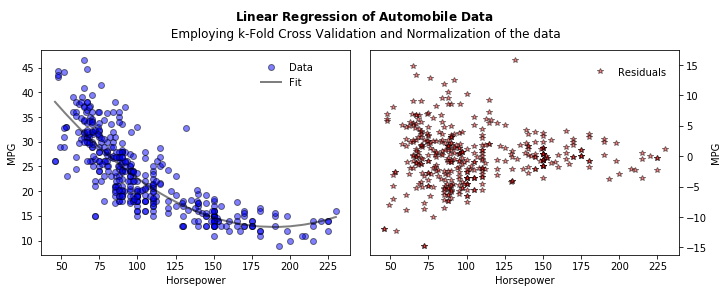

In [27]:
#Plotting the data set and residuals using the binomial model 
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout =True, sharex=True, sharey=False)
alpha = 0.5 #transparency 

ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('MPG')
ax[0].plot(X, Y, 'o', alpha=alpha, color = 'blue', markeredgecolor = 'k', label = 'Data')
ax[0].plot(X.sort_values('horsepower'), binomial_fit.predict(X_transformed_df.iloc[:,0:2].sort_values('hp')), alpha=alpha, lw = 2, \
        color = 'k', label = 'Fit')
lgd = ax[0].legend(loc = (0.7, 0.8), frameon=False)

ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('MPG')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].plot(X, residuals, '*', alpha=alpha, color = 'red', markeredgecolor = 'k', label = 'Residuals')
lgd = ax[1].legend(loc = (0.7, 0.85), frameon=False)

fig.suptitle('$\mathbf{Linear\ Regression\ of\ Automobile\ Data}$ \n Employing k-Fold Cross Validation and Normalization of the data')

plt.show()

In [28]:
fig.savefig('k-fold_CV_LinReg.png', dpi = 100, format = 'png')